In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load your dataset
df = pd.read_excel('Student-Employability-Datasets.xlsx')

# Define the feature columns
features = [
    'GENERAL APPEARANCE', 'MANNER OF SPEAKING', 'PHYSICAL CONDITION',
    'MENTAL ALERTNESS', 'SELF-CONFIDENCE', 'ABILITY TO PRESENT IDEAS',
    'COMMUNICATION SKILLS', 'Student Performance Rating'
]

# Separate the features
X = df[features]

# Standardize the features (important for PCA)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [3]:
# Initialize PCA
pca = PCA()

# Fit PCA
pca.fit(X_scaled)

# Explained variance for each component
explained_variance = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance)

# Cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative Explained Variance:", cumulative_variance)


Explained Variance Ratio: [0.5526148  0.1379806  0.08298072 0.06597389 0.05074906 0.04109003
 0.03707099 0.03153991]
Cumulative Explained Variance: [0.5526148  0.6905954  0.77357612 0.83955001 0.89029907 0.9313891
 0.96846009 1.        ]


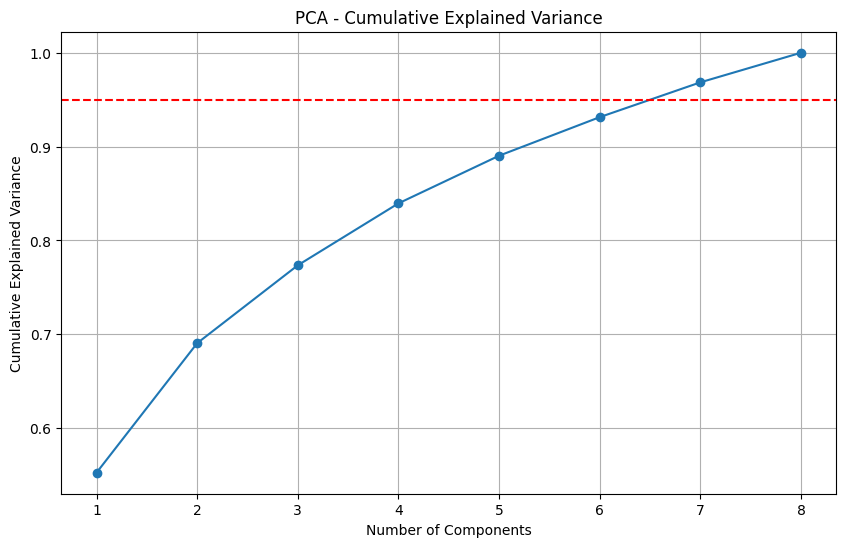

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Cumulative Explained Variance')
plt.grid()
plt.axhline(y=0.95, color='r', linestyle='--')
plt.show()


In [10]:
# Apply PCA with 3 components
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame with the PCA components
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]
df_pca = pd.DataFrame(X_pca, columns=pca_columns)

# Combine with the target variable (if applicable)
# df_pca['Target'] = df['Target_Column']

print(df_pca.head())


        PC1       PC2       PC3
0  2.944651  1.022443 -1.461929
1 -0.119563  0.622146  0.149061
2 -3.185530  0.391126  0.954074
3 -3.640819  0.927134 -0.698435
4 -1.147776  0.694427 -0.183229


In [6]:
# Display the component loadings
loadings = pd.DataFrame(pca.components_, columns=features, index=pca_columns)
print(loadings)


     GENERAL APPEARANCE  MANNER OF SPEAKING  PHYSICAL CONDITION  \
PC1            0.298682            0.386249            0.377571   
PC2           -0.314045            0.105707           -0.062675   
PC3            0.728305           -0.296229            0.208078   

     MENTAL ALERTNESS  SELF-CONFIDENCE  ABILITY TO PRESENT IDEAS  \
PC1          0.407135         0.388957                  0.399214   
PC2          0.009350        -0.184816                  0.227314   
PC3          0.041140         0.024881                 -0.185135   

     COMMUNICATION SKILLS  Student Performance Rating  
PC1              0.376137                    0.033816  
PC2              0.063248                    0.892389  
PC3             -0.391444                    0.385629  


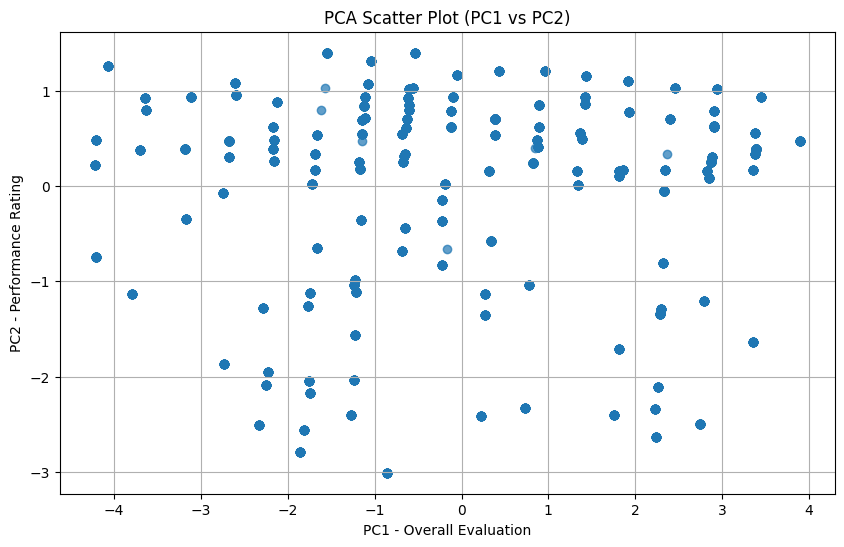

In [11]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], alpha=0.7)
plt.xlabel('PC1 - Overall Evaluation')
plt.ylabel('PC2 - Performance Rating')
plt.title('PCA Scatter Plot (PC1 vs PC2)')
plt.grid()
plt.show()


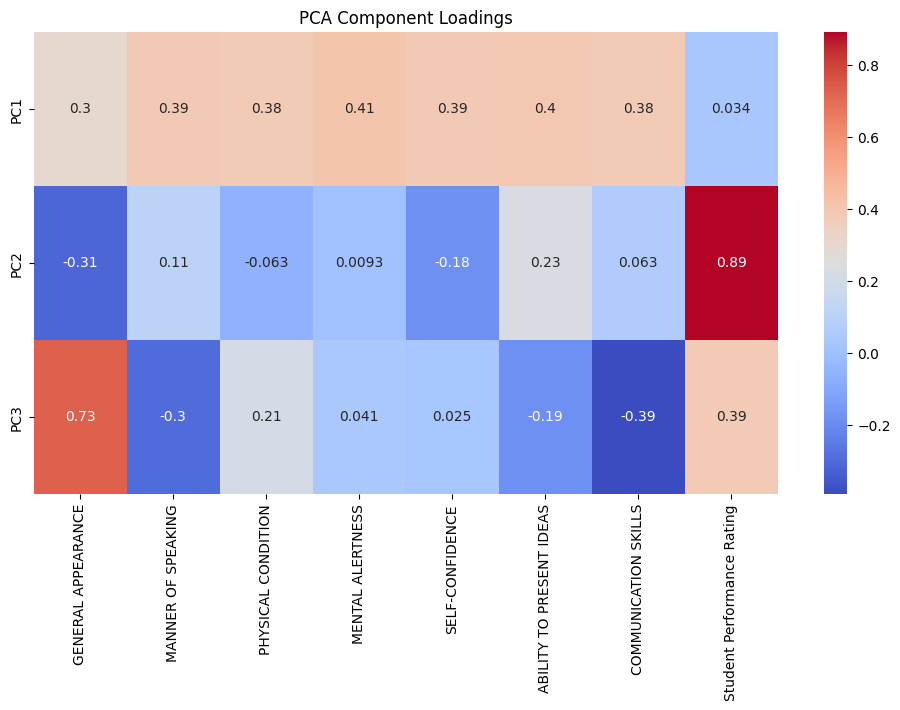

In [12]:
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.heatmap(loadings, annot=True, cmap='coolwarm', cbar=True)
plt.title("PCA Component Loadings")
plt.show()
